In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ridgeRegression import *
from diffevol import *
import openbabel as ob
from moleculToVector import *
from thetas import *

/home/xomaiya/.conda/envs/ml/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
structs = read_dataset('test-Olesya/11_cis-pos-1.xyz')
# structs = read_dataset('test-Olesya/11_cis-pos-1.xyz') + read_dataset('test-Olesya/11_cis-pos-1_1.xyz')
struct_description, amber_coeffs = get_struct_description()
dataset = get_dataset(structs, struct_description)
thetas = get_initial_thetas()

In [4]:
structs_with_forces = read_dataset('forces/gphase/t-1/11_cis-pos-1.xyz', 'forces/gphase/t-1/forces')
structs_with_forces = structs_with_forces[:1000]

In [8]:
struct_description, amber_coeffs = get_struct_description()
dataset = get_dataset(structs_with_forces, struct_description)
thetas = get_initial_thetas()

In [11]:
N = dataset.bonds_matrix.shape[1] + dataset.angles_matrix.shape[1] + dataset.torsions_matrix.shape[1] + dataset.pairs_matrix.shape[1] + len(struct_description.atoms) + 1
HH, std = constrHH(dataset_with_description[0], dataset_with_description[1], np.ones(N))


KeyboardInterrupt: 

In [5]:
y = np.array([struct.energy for struct in structs])

In [12]:
# dataset = dataset_with_description
de = DE(dataset, struct_description, y)
N = dataset.bonds_matrix.shape[1] + dataset.angles_matrix.shape[1] + dataset.torsions_matrix.shape[1] + dataset.pairs_matrix.shape[1] + len(struct_description.atoms) + 1
de.run(N, 10)

525.7471161558544
501.5144426170654
315.5460482376598
315.5460482376598
315.5460482376598
265.80751330959924
114.99663920849318
114.99663920849318
69.9277718907353
35.991840434954
33.278823519820286
22.736372073194882
11.828821415336904
11.828821415336904
11.828821415336904
10.878770367180973
8.815532393703153
7.816091046974558
5.595630275146705
5.595630275146705
5.595630275146705
5.595630275146705
5.595630275146705
5.595630275146705
5.436799721110078
5.295281061155782
5.283167542500129
5.283167542500129
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.610354313576931
4.610354313576931
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288

KeyboardInterrupt: 

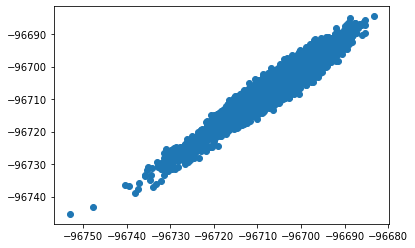

In [14]:
H, stdH = constrH(dataset, struct_description, de.best_p[1:])
# y = np.array([struct[2] for struct in structs])
y = np.array([struct.energy for struct in structs])
l = de.best_p[0]
C, y_est = RidgeRegression(H, y, l)
plt.scatter(y, y_est)

In [13]:
np.corrcoef(y, y_est)

array([[1.        , 0.95382606],
       [0.95382606, 1.        ]])

In [11]:
for i, j in zip(thetas, de.best_p):
    print(i, j)

1.09 6.403701465983985e-05
1.09 13.583652248714767
1.09 7.822895487574751
1.09 1.8641948117476537
1.526 0.6553234247718844
1.09 1.9467042668163828
1.09 0.423209723754101
1.09 0.7665676748091335
1.526 2.163044654986168
1.526 50.31414601680875
1.09 14.06654973503728
1.09 0.5265540715050501
1.51 5.129742516075391
1.51 29.024856561480686
1.09 0.5494837831223888
1.471 5.641850263419495
1.09 3.394199728071455
1.08 3.781153267638276
1.51 0.42193676088484816
1.09 4.356786879693626
1.09 1.267518500777257
1.34 0.8210713706730741
1.4 5.098251130429926
1.09 1.0514905385815247
1.471 18.74963355949858
1.08 1.8488799835584524
1.09 0.8400043558303786
1.34 0.68084455518829
1.34 1.1855120965389732
1.09 63.19401701397476
1.08 0.08602031677502014
1.526 0.5289535884370798
1.09 0.41887364698635876
1.08 0.647114906728737
1.09 0.8297086235366853
1.09 1.0885995672743751
1.4 1.1131957942514845
1.4 0.14202864500145146
1.4 3.965412882528716
1.4 6.0806660617809385
1.08 19.159121983363423
1.4 4.780546944884614
1.4 

In [9]:
for i in de.best_p[len(thetas):]:
    print(i)

-112.40666434830906
29.367717883998665
-45.4346898905668
31.054914944428166
20.209394240823432
-18.585459799024363
-31.75731408906839
-0.07550067965979423
7.488424337988192
-121.21395589911505
43.764787712039634
199.19616057181887
3.1763832396188807
68.99273099008104
7.410300786878844
59.256098982881795
-12.083046248992872
-140.35886922121455
10.025218408998136
25.52437392280268
-17.352080319281974
45.94463580699333
121.46439630400951
119.50749275894856
-16.05103622898965
-33.41958189706844
646.0279704990219
-1.4471033138803122
-38.271127550789714
-61.66423513264548
-5.522850695570135
170.51001309657647
-94.39809099842186
11.557412650143593
45.419940070142445
-4.550660129452869
12.343221913665563
-80.00693702054734
-4.4691060252254236
-94.93763758998207
-24.371959517639734
34.60183435332961
544.5025725699832
-15.405736349570194
25.1158180275892
-34.229570202567714
34.42504175235112
15.444424187697452
102.910020314805
-12.106227637897417
16.133119917132866
-113.40913488989588
-28.543680

In [15]:
b = len(de.struct_description[0])
a = len(de.struct_description[1])
t = len(de.struct_description[2])
p = len(de.struct_description[3])
print(b, a, t, p)

print(len(thetas), b + a + t)
print(len(de.best_p), b + a + t + 2 * p)
print(N)

57 102 131 131
290 290
1887 552
1887


In [2]:
H, stdH = constrH(dataset_with_description, de.best_p[1:])
y = np.array([struct[2] for struct in structs])
l = de.best_p[0]
C, y_est = RidgeRegression(H, y, l)
plt.scatter(y, y_est)

NameError: name 'constrH' is not defined

In [3]:
for i, j in zip(thetas, de.best_p):
    print(i, j)

NameError: name 'thetas' is not defined

In [7]:
structs[0]

-96753.16495624499

In [69]:
struct_description1, amber_coeffs = get_struct_description()

In [70]:
thetas = amber_coeffs[1] + amber_coeffs[3] + amber_coeffs[5] + amber_coeffs[6] + amber_coeffs[8] 

In [71]:
dataset_with_description1 = get_dataset([struct], struct_description1)

In [72]:
H, stdH = constrH(dataset_with_description1, thetas)

In [73]:
linear_coeffs = amber_coeffs[0] + amber_coeffs[2] + amber_coeffs[4] +  amber_coeffs[7] + [138.935485 * 0.0239006] * len(struct_description1[4])

In [74]:
y_est = H.dot(linear_coeffs)

In [57]:
y = [struct[2] for struct in structs[:3000]]

In [75]:
ys = struct[2]
print(ys, y_est)

-96753.16495624499 [41.65055883]


In [77]:
# H[:, :len(amber_coeffs[0])].shape, amber_coeffs[0]
kb = len(amber_coeffs[0])
ka = len(amber_coeffs[2])
kt = len(amber_coeffs[4])
kq = len(amber_coeffs[7])
keps = len(struct_description1[4])

yest1 = H[:, :kb].dot(amber_coeffs[0])
yest2 = H[:, kb:ka+kb].dot(amber_coeffs[2])
yest3 = H[:, kb+ka:kb+ka+kt].dot(amber_coeffs[4])
yest4 = H[:, kb+ka+kt:kb+ka+kt+kq].dot(amber_coeffs[7])
yest5 = H[:, kb+ka+kt+kq:kb+ka+kt+kq+keps].dot([138.935485 * 0.0239006] * len(struct_description1[4]))

print(yest1, yest2, yest3, yest4, yest5)

[9.49555373] [20.19460322] [10.58116635] [-1.86433837] [3.2435739]


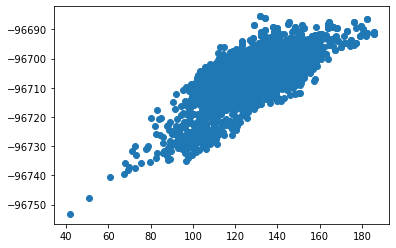

In [67]:
plt.scatter(y_est, y)

Text(0, 0.5, '$LOOCV_{error}$')

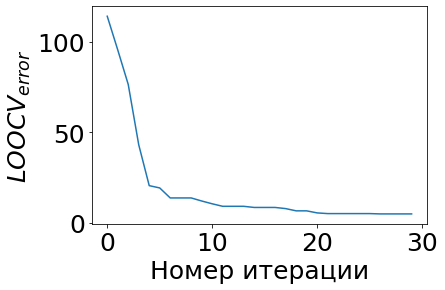

In [9]:
plt.rcParams.update({'font.size': 25})
x = np.array([1143.4, 957.2, 765.9, 432.0, 205.8, 193.1, 137.7, 137.7, 137.7, 120.8, 105.3, 91.4, 91.4, 91.4, 85.1, 85.1, 85.1, 78.7, 66.3, 66.3, 54.9, 
    51.1, 51.1, 51.1, 51.1, 51.1, 49.3, 49.3, 49.3, 49.3]) / 10

plt.plot(x)
plt.xlabel('Номер итерации')
plt.ylabel('$LOOCV_{error}$')